## 📚 **Tugas Projek UTS**  

---

### Disusun oleh **Kelompok 3**

| No | Nama Lengkap                       | NIM         |
|----|-------------------------------------|------------|
| 1  | Mayadi Alamsyah Putra Silalahi     | 231402046 |
| 2  | Naurah Alya Rahmah                 | 231402049 |
| 3  | Ferdyan Darwis                     | 231402092 |

---

### 📝 **Deskripsi Projek**
> Projek ini dibuat untuk memenuhi tugas UTS pada mata kuliah **[Fundamental Big Data]**.  
> Fokus utama dari projek ini adalah *[mengekstrak, memvisualisasi informasi, dan mengambil insight atau wawasan dari dataset]*.


---

### 📅 **Tanggal Pengumpulan:**  
**?? Oktober 2025**



# Data Preparation

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
from sklearn import preprocessing

## Import data

In [358]:
train = pd.read_csv("forest_health_data_with_target.csv")
test = pd.read_csv("forest_health_data.csv")

In [359]:
train.head()

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
0,1,24.981605,-117.040695,29.862040,20.835684,6.147963,4.542720,29.171563,212.518419,30.209377,93.086241,0.379904,0.268850,0.328882,0.487287,0.682938,2.998681,0.004402,0.812948,Healthy
1,2,48.028572,-92.066934,28.462986,24.307079,8.248891,5.260921,7.757386,641.640332,29.054905,62.028839,0.339583,0.073260,0.044616,0.013501,0.723696,3.986987,0.000330,0.678542,Very Healthy
2,3,39.279758,-68.893791,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,8.351397,77.992822,0.184392,0.297665,0.124953,0.474088,2.129934,3.250667,0.472263,0.889075,Healthy
3,4,33.946339,-78.744258,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,37.290034,54.883864,0.611194,0.160819,0.387971,0.187495,1.717352,1.333210,0.029294,0.449336,Unhealthy
4,5,16.240746,-73.540720,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,24.896527,70.402766,0.481858,0.030913,0.266699,0.009995,2.476038,1.742321,0.974533,0.893890,Unhealthy


In [360]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Plot_ID                  1000 non-null   int64  
 1   Latitude                 1000 non-null   float64
 2   Longitude                1000 non-null   float64
 3   DBH                      1000 non-null   float64
 4   Tree_Height              1000 non-null   float64
 5   Crown_Width_North_South  1000 non-null   float64
 6   Crown_Width_East_West    1000 non-null   float64
 7   Slope                    1000 non-null   float64
 8   Elevation                1000 non-null   float64
 9   Temperature              1000 non-null   float64
 10  Humidity                 1000 non-null   float64
 11  Soil_TN                  1000 non-null   float64
 12  Soil_TP                  1000 non-null   float64
 13  Soil_AP                  1000 non-null   float64
 14  Soil_AN                  

### Deskripsi Dataset

Dataset ini berisi pengukuran pohon dan variabel lingkungan pada setiap plot/lokasi studi. Setiap baris merepresentasikan satu pengamatan (plot atau pohon) dengan informasi spasial, morfometri pohon, kondisi lingkungan, parameter tanah, indeks keanekaragaman, serta indikator gangguan dan risiko.

---

Kolom & Penjelasan

- **Plot_ID**  
  Identifier unik untuk setiap plot tempat pengukuran dilakukan.

- **Latitude**  
  Lintang geografis plot dalam derajat (menunjukkan posisi utara–selatan).

- **Longitude**  
  Bujur geografis plot dalam derajat (menunjukkan posisi timur–barat).

- **DBH (Diameter at Breast Height)**  
  Diameter batang di ketinggian 1.3 m di atas tanah, biasanya dalam sentimeter (cm).

- **Tree_Height**  
  Tinggi total pohon dari pangkal sampai puncak, dalam meter (m).

- **Crown_Width_North_South**  
  Lebar kanopi pada arah utara–selatan, dalam meter (m).

- **Crown_Width_East_West**  
  Lebar kanopi pada arah timur–barat, dalam meter (m).

- **Slope**  
  Kemiringan lahan di lokasi pohon, diukur dalam derajat (°). Mempengaruhi drainase, erosi, dan perkembangan akar.

- **Elevation**  
  Ketinggian plot di atas permukaan laut, dalam meter (m). Berpengaruh pada iklim lokal dan dinamika ekosistem.

- **Temperature**  
  Suhu rata-rata yang tercatat di plot, dalam derajat Celsius (°C).

- **Humidity**  
  Kelembapan rata-rata di plot, dalam persen (%).

- **Soil_TN (Total Nitrogen)**  
  Konsentrasi nitrogen total dalam tanah, dalam gram per kilogram (g/kg).

- **Soil_TP (Total Phosphorus)**  
  Konsentrasi fosfor total dalam tanah, dalam gram per kilogram (g/kg).

- **Soil_AP (Available Phosphorus)**  
  Fosfor yang tersedia bagi tanaman dalam tanah, dalam gram per kilogram (g/kg). Menilai ketersediaan nutrisi.

- **Soil_AN (Available Nitrogen)**  
  Nitrogen yang tersedia untuk diambil oleh tanaman, dalam gram per kilogram (g/kg).

- **Menhinick_Index**  
  Indeks keanekaragaman yang mencerminkan kekayaan spesies (Menhinick). Nilai lebih tinggi menunjukkan biodiversitas yang lebih besar.

- **Gleason_Index**  
  Indeks keanekaragaman lain yang mempertimbangkan kelimpahan dan kekayaan spesies (Gleason).

- **Disturbance_Level**  
  Variabel kategorikal yang menunjukkan tingkat gangguan ekologis pada area: `0` = rendah, `1` = sedang, `2` = tinggi.

- **Fire_Risk_Index**  
  Skor risiko kebakaran berdasarkan kondisi lingkungan, bernilai antara `0` dan `1` (mendekati 1 = risiko lebih tinggi).

- **Health_Status**  
  Variabel kategorikal yang menunjukkan kondisi kesehatan pohon.



# EDA (Exploratory Data Analysis)

Mengecek nilai unik pada kolom ```Health_Status```

In [361]:
print(train["Health_Status"].unique())

['Healthy' 'Very Healthy' 'Unhealthy' 'Sub-healthy']


Hapus kolom Plot_ID

In [362]:
train.drop(columns=["Plot_ID"], inplace=True)

In [363]:
train.describe()

,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,29.610262,-94.508789,52.728544,15.730501,5.446948,5.486180,22.198898,1498.874791,22.027384,59.743599,0.510635,0.255100,0.251220,0.249344,1.762232,2.963965,0.512124,0.509207
std,11.685494,20.453293,27.614049,8.021702,2.581289,2.602753,13.038014,826.251755,9.878208,22.572259,0.283588,0.146605,0.142471,0.145486,0.724376,1.163286,0.287952,0.281458
min,10.185281,-129.774722,5.001105,2.018295,1.000276,1.055654,0.064275,100.698914,5.008503,20.004226,0.010934,0.005078,0.005596,0.005660,0.503300,1.001239,0.000252,0.000854
25%,19.438931,-113.124801,29.828343,8.773222,3.204766,3.244420,10.809975,784.368948,13.728430,41.131530,0.260105,0.130452,0.127690,0.121242,1.136698,1.947451,0.270524,0.277123
50%,29.872295,-93.688627,52.558322,15.559820,5.451383,5.413625,21.808936,1503.573023,21.754533,59.614944,0.511302,0.249754,0.247471,0.243803,1.752412,2.969374,0.523023,0.516489
75%,39.772784,-76.767446,77.114835,22.651143,7.659941,7.658666,34.040896,2171.952127,30.056674,78.897379,0.759135,0.387961,0.377836,0.377283,2.421229,3.987144,0.750194,0.746163
max,49.988707,-60.041039,99.792981,29.987616,9.979745,9.994153,44.975731,2996.823629,39.860447,99.960415,0.999676,0.499671,0.499356,0.499428,2.999513,4.999699,0.999150,0.997163


### Insight Data

Dari describe, didapat beberapa hal, yaitu:

#### Dimensi dan Struktur Pohon
- **Diameter pada Tinggi Dada (DBH):** Rata-rata DBH sekitar **52.73 cm**, dengan rentang dari **5 cm** hingga hampir **100 cm**. Variasi ini menunjukkan adanya rentang umur pohon yang beragam, karena DBH sering berkorelasi dengan usia pohon.  
- **Tinggi Pohon:** Tinggi berkisar antara ~**2 m** sampai ~**30 m**, dengan rata-rata ~**15.73 m**, menunjukkan berbagai tahap pertumbuhan dan kemungkinan keberagaman spesies.  
- **Lebar Kanopi:** Lebar kanopi utara-selatan dan timur-barat rata-rata sekitar **5.45 m**, mengindikasikan kanopi yang umumnya simetris.

#### Kondisi Lingkungan
- **Elevasi:** Elevasi berkisar dari ~**100 m** sampai ~**2997 m**, dengan median **~1503 m**, menunjukkan pohon berada di berbagai zona altitudinal.  
- **Kemiringan (Slope):** Kemiringan berkisar dari ~**0.06°** sampai ~**44.98°**, dengan rata-rata **~22.2°**, mengindikasikan banyak pohon berada di lereng yang terjal.  
- **Suhu & Kelembapan:** Suhu berkisar dari **5°C** sampai **~39.86°C**, rata-rata **~22°C**. Kelembapan berkisar dari **20%** sampai **~99.96%**, rata-rata **~59.74%**. Rentang lebar ini mencerminkan kondisi iklim yang beragam yang mempengaruhi kesehatan dan pertumbuhan pohon.

#### Komposisi Tanah
- **Kandungan Nutrisi:** Nilai tengah (median) untuk nutrisi tanah (Soil_TN, Soil_TP, Soil_AP, Soil_AN) sekitar **0.25 g/kg**, dengan rentang hingga **~0.5–1 g/kg**. Variabilitas kesuburan tanah ini dapat berpengaruh signifikan terhadap vitalitas pohon dan biodiversitas.

#### Keanekaragaman dan Gangguan
- **Indeks Keanekaragaman:** Menhinick Index berkisar dari **~0.5** sampai **~3**, dan Gleason Index dari **~1** sampai **~5**, menunjukkan keragaman spesies yang berskala sedang di dalam plot.  
- **Gangguan & Risiko Kebakaran:** Kedua indeks (gangguan dan fire risk) memiliki rata-rata sekitar **0.51**, dengan nilai dari mendekati **0** sampai **~1**, menunjukkan variasi tingkat stres lingkungan yang mempengaruhi pohon.

#### Distribusi Status Kesehatan
- **Health_Status:** Dengan kuartil pada **0, 2, dan 2**, banyak pohon diklasifikasikan sebagai **'Sehat'** atau **'Sangat Sehat'**. Namun, adanya pohon yang diberi label **'Tidak Sehat'** atau **'Sub-sehat'** menandakan area-area tertentu yang mungkin memerlukan intervensi.

#### Potensi Implikasi
- **Dampak Lingkungan terhadap Kesehatan Pohon:** Rentang elevasi, kemiringan, suhu, dan kelembapan yang lebar menunjukkan pohon terekspos pada kondisi lingkungan yang sangat beragam, yang dapat mempengaruhi pola pertumbuhan dan kesehatan mereka.  
- **Peran Kesuburan Tanah:** Variasi tingkat nutrisi tanah mungkin berkorelasi dengan status kesehatan pohon, menyiratkan bahwa pengelolaan tanah bisa menjadi kunci untuk menjaga atau meningkatkan vitalitas pohon.  
- **Pertimbangan Keanekaragaman Hayati:** Indeks keragaman yang sedang menunjukkan ekosistem yang relatif seimbang, tetapi area dengan keragaman rendah mungkin lebih rentan terhadap gangguan dan membutuhkan upaya konservasi.  
- **Manajemen Gangguan dan Kebakaran:** Mengingat adanya tingkat gangguan dan skor risiko kebakaran yang bervariasi, penerapan praktik pengelolaan untuk mengurangi risiko dan dampak kebakaran penting demi pelestarian kesehatan hutan.


### Mengubah tipe data kolom ```Health_Status```
Jika diperhtikan, kolom ```Health_Status``` merupakan katerogikal ordinal. Untuk itu, kita bisa ubah tipe data kolom ```Health_Status``` menjadi numericsebagai berikut:

In [364]:
mapping = {
    'Unhealthy': 0,
    'Sub-healthy': 1,
    'Healthy': 2,
    'Very Healthy': 3
}

train["Health_Status"] = train["Health_Status"].map(mapping)

## Correlation Matrix

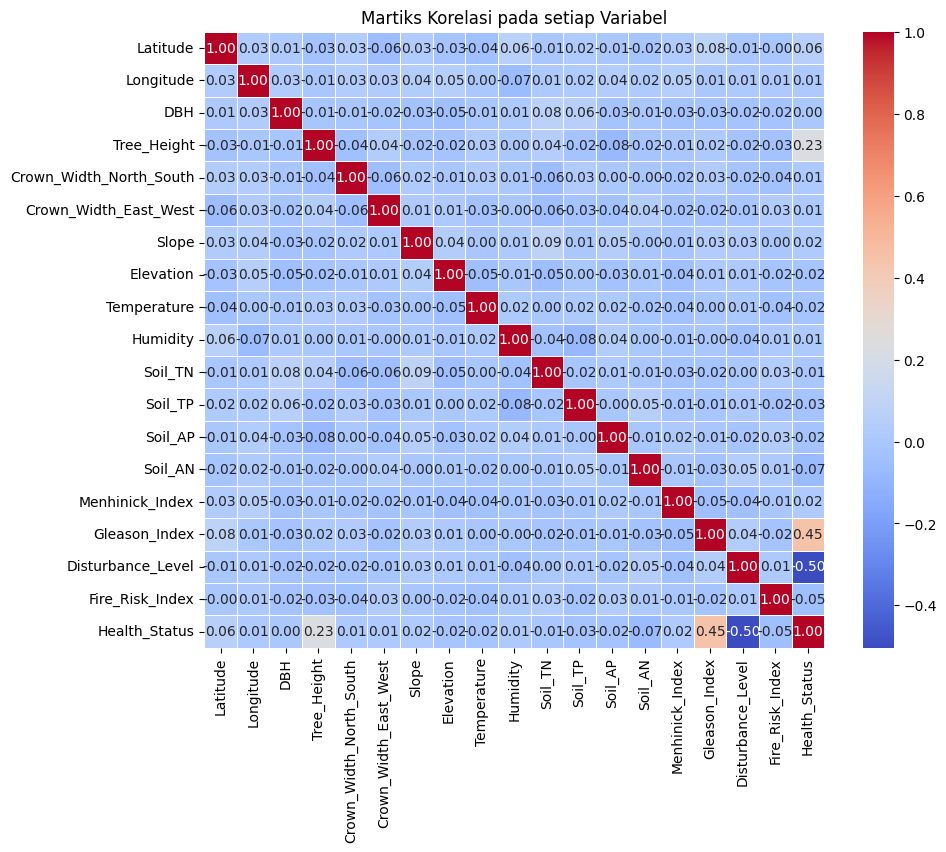

In [365]:
# Compute correlation matrix
correlation_matrix = train.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Title
plt.title("Martiks Korelasi pada setiap Variabel")

plt.show()

### Insight dari Correlation Matrix


- **Health_Status** menunjukkan korelasi positif sedang dengan **Gleason_Index** (~**0.45**) — semakin tinggi Gleason (keanekaragaman/kelimpahan), cenderung semakin sehat pohon.

- **Health_Status** memiliki korelasi positif kecil–sedang dengan **Tree_Height** (~**0.23**) — pohon yang lebih tinggi cenderung lebih sehat.

- **Health_Status** memiliki korelasi negatif cukup kuat dengan **Disturbance_Level** (~**-0.50**) — kenaikan tingkat gangguan lingkungan berkaitan dengan menurunnya kesehatan pohon.


## Visualisasi Data

### Distribusi Health Status


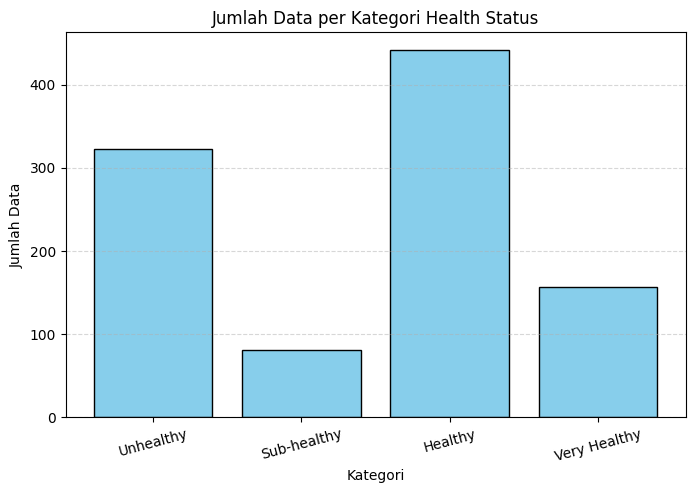

In [366]:
# Hitung jumlah data per kategori
counts = train["Health_Status"].value_counts().sort_index()

# Buat label kategori berdasarkan mapping awal
labels = ['Unhealthy', 'Sub-healthy', 'Healthy', 'Very Healthy']

# Buat bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color='skyblue', edgecolor='black')

# Judul dan label
plt.title('Jumlah Data per Kategori Health Status')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)



### Visualisasi **Gleason_Index**, **Tree_Height**, dan **Disturbance_Level** 

Pada chart correlation matrix sebelumnya, ```Gleason_Index```, ```Tree_Height```, dan ```Disturbance_Level``` merupakan 3 fitur terkuat yang berkorelasi dengan ```Health_Status``` <br><br>
Mari kita lihat visualisasinya:

C:\Users\mayad\AppData\Local\Temp\ipykernel_14268\585158758.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


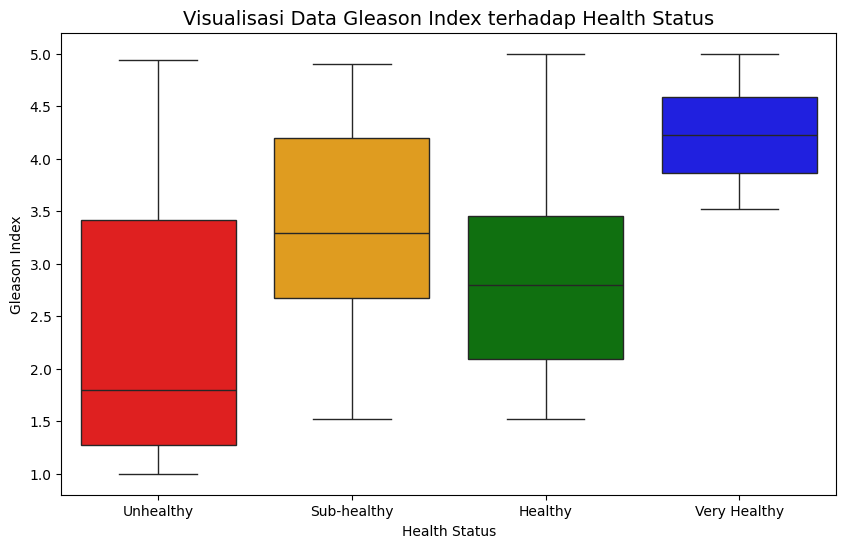

In [367]:
#Visualisasi Gleason Index

warna_kategori = ["red", "orange", "green", "blue"]

# Visualisasi dengan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=train["Health_Status"], 
    y=train["Gleason_Index"],
    palette=warna_kategori
)

# Ganti label angka menjadi kategori
plt.xticks(
    ticks=[0, 1, 2, 3], 
    labels=["Unhealthy", "Sub-healthy", "Healthy", "Very Healthy"]
)

# Label dan judul
plt.xlabel("Health Status")
plt.ylabel("Gleason Index")
plt.title("Visualisasi Data Gleason Index terhadap Health Status", fontsize=14)

plt.show()

C:\Users\mayad\AppData\Local\Temp\ipykernel_14268\1509402718.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


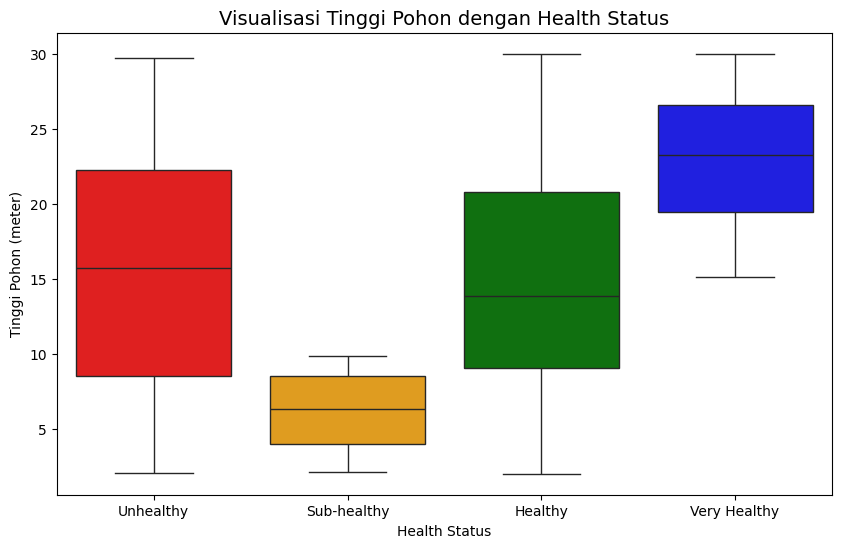

In [368]:
#Visualisasi Gleason Index

warna_kategori = ["red", "orange", "green", "blue"]

# Visualisasi dengan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=train["Health_Status"], 
    y=train["Tree_Height"],
    palette=warna_kategori
)

# Ganti label angka menjadi kategori
plt.xticks(
    ticks=[0, 1, 2, 3], 
    labels=["Unhealthy", "Sub-healthy", "Healthy", "Very Healthy"]
)

# Label dan judul
plt.xlabel("Health Status")
plt.ylabel("Tinggi Pohon (meter)")
plt.title("Visualisasi Tinggi Pohon dengan Health Status", fontsize=14)

plt.show()

C:\Users\mayad\AppData\Local\Temp\ipykernel_14268\1300725067.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


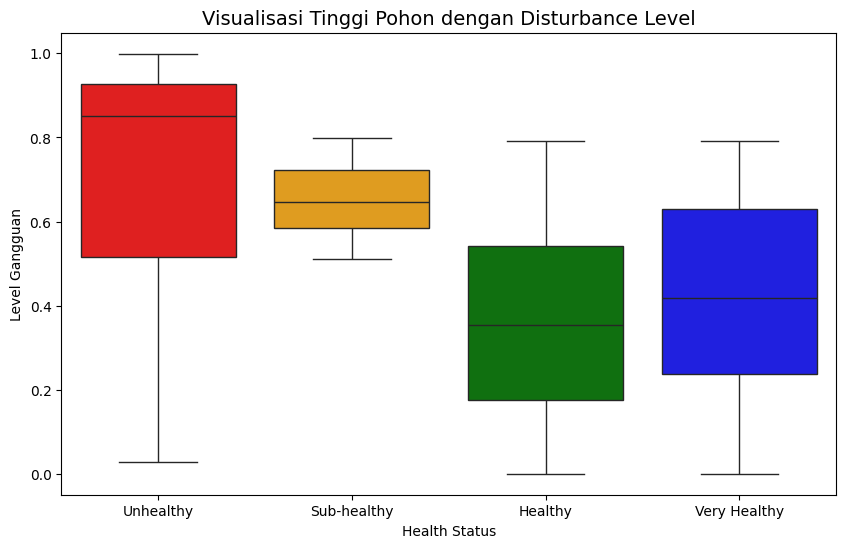

In [369]:
#Visualisasi Disturbance Level

warna_kategori = ["red", "orange", "green", "blue"]

# Visualisasi dengan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=train["Health_Status"], 
    y=train["Disturbance_Level"],
    palette=warna_kategori
)

# Ganti label angka menjadi kategori
plt.xticks(
    ticks=[0, 1, 2, 3], 
    labels=["Unhealthy", "Sub-healthy", "Healthy", "Very Healthy"]
)

# Label dan judul
plt.xlabel("Health Status")
plt.ylabel("Level Gangguan")
plt.title("Visualisasi Tinggi Pohon dengan Disturbance Level", fontsize=14)

plt.show()

Yang menarik dari diagram di atas adalah penyebaran data pada pohon dengan status Unhealthy dan Healthy hampir sama. Hal ini mengindikasikan bahwa tinggi pohon saja tidak menentukan langsung status kesehatan dari suatu pohon.
Faktor kuat lain seperti Disturbance Level dan Gleason Index juga menentukan.

### Visualisasi Latitude dan Longitude

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


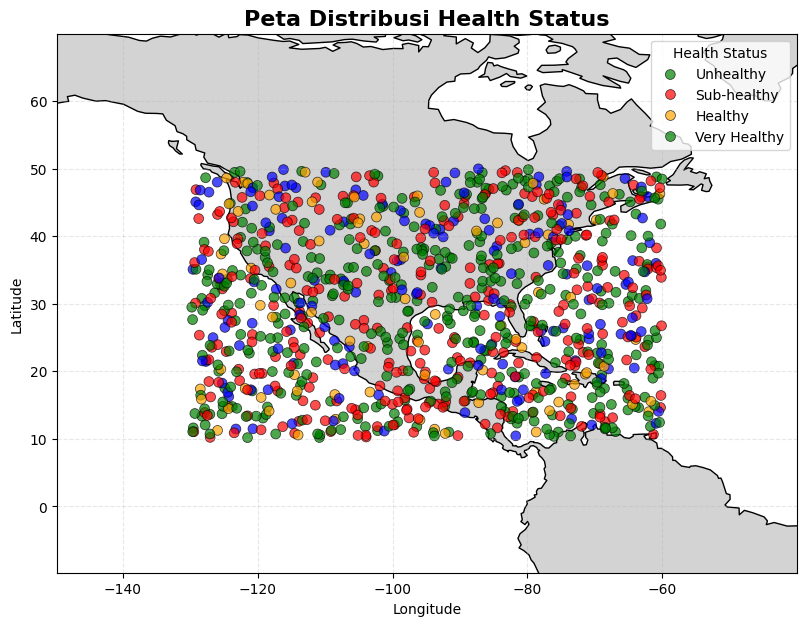

In [370]:
!pip install geodatasets
!pip install geopandas

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geodatasets

# Muat peta dunia
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))

# Warna kategori
status_palette = {0: "red", 1: "orange", 2: "green", 3: "blue"}

# Tentukan batas zoom dari data (dengan margin sedikit biar rapi)
lon_min, lon_max = train["Longitude"].min() - 20, train["Longitude"].max() + 20
lat_min, lat_max = train["Latitude"].min() - 20, train["Latitude"].max() + 20

# Plot peta
fig, ax = plt.subplots(figsize=(14, 7))
world.plot(ax=ax, color="lightgray", edgecolor="black")

# Scatter plot data
sns.scatterplot(
    x=train["Longitude"],
    y=train["Latitude"],
    hue=train["Health_Status"],
    palette=status_palette,
    alpha=0.7,
    edgecolor="black",
    s=50
)

# Zoom in ke area data
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

plt.title("Peta Distribusi Health Status", fontsize=16, fontweight="bold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Health Status", labels=["Unhealthy", "Sub-healthy", "Healthy", "Very Healthy"])
plt.grid(alpha=0.3, linestyle='--')
plt.show()


Jika diperhatikan lenih seksama pada visualisasi peta distribusi data pohon, terlihat bahwa koordinat Latitude dan Longitude tidak merepresentasikan posisi pohon dengan akurat. Sebagian titik bahkan berada di wilayah perairan, yang secara logis tidak mungkin menjadi lokasi pohon. Agar tidak menimbulkan noise dan distorsi pada model prediksi, kolom Latitude dan Longitude dihapus dari dataset sehingga fitur yang digunakan dalam pelatihan model menjadi lebih relevan dan akurat

In [371]:
train.drop(["Latitude", "Longitude"], axis=1, inplace=True)

# Modelling

In [ ]:
train

,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
0,29.862040,20.835684,6.147963,4.542720,29.171563,212.518419,30.209377,93.086241,0.379904,0.268850,0.328882,0.487287,0.682938,2.998681,0.004402,0.812948,2
1,28.462986,24.307079,8.248891,5.260921,7.757386,641.640332,29.054905,62.028839,0.339583,0.073260,0.044616,0.013501,0.723696,3.986987,0.000330,0.678542,3
2,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,8.351397,77.992822,0.184392,0.297665,0.124953,0.474088,2.129934,3.250667,0.472263,0.889075,2
3,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,37.290034,54.883864,0.611194,0.160819,0.387971,0.187495,1.717352,1.333210,0.029294,0.449336,0
4,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,24.896527,70.402766,0.481858,0.030913,0.266699,0.009995,2.476038,1.742321,0.974533,0.893890,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,87.203097,14.378997,9.076576,7.159918,26.088170,892.162899,23.022532,88.612479,0.365851,0.007299,0.470416,0.215047,2.127209,1.030366,0.317082,0.621856,0
996,19.940955,11.363233,2.074429,5.528984,30.016659,707.605751,10.787965,91.800707,0.927440,0.437466,0.347990,0.458267,0.944496,3.290682,0.536056,0.760532,2
997,34.429847,13.048025,3.950586,7.886340,41.020960,1420.453374,39.219948,95.736633,0.701670,0.157126,0.434471,0.251479,0.628099,3.868748,0.661191,0.725692,2
998,32.554326,16.838336,8.341708,5.367616,15.552908,2734.468889,8.777359,51.799039,0.264605,0.469601,0.186396,0.202424,2.207404,3.980321,0.703485,0.692031,3


## Split data

In [373]:
from sklearn.model_selection import train_test_split
X = train.drop(columns='Health_Status')
y = train['Health_Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Kami menggunakan parameter random state = 42 untuk memudahkan replikasi dan kolaborasi pengerjaan

## Normalisasi/Scaling Data

In [374]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Buat scaler dan fit ke X_train
scaler = StandardScaler()
scaler.fit(X_train)

# Transform X_train dan X_test pakai scaler yang sama
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Membangun model dan prediksi

Kali ini, kami menggunaka 5 algoritma yaitu **```Logistik Regression```**, **```SVC (Support Vector Classificier)```**, **```Decision Tree```**, **```Naive Bayes```**, dan **```KNN```**

In [375]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import f1_score

In [376]:
# Buat model Logistic Regression
lr = LogisticRegression()

# Latih model
lr.fit(X_train, y_train)

# Prediksi data test
y_pred = lr.predict(X_test)

# Hitung accuracy
accuracy_lr = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Logistic Regression:", accuracy_lr)

# Hitung F1 Score
f1_lr = f1_score(y_test, y_pred, average='weighted')
print("F1 engan menggunakan Logistic Regression:", f1_lr)


Akurasi dengan menggunakan Logistic Regression: 0.66
F1 engan menggunakan Logistic Regression: 0.6542153550090626


In [377]:
# Buat model Support Vector
svm = SVC(
  kernel = 'rbf',
  C = 1,
  gamma = 0.1
)

# Latih model
svm.fit(X_train, y_train)

# Prediksi data test
y_pred = svm.predict(X_test)

# Hitung accuracy
accuracy_svc = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector: ", accuracy_svc)

# Hitung F1 Score
f1_svc = f1_score(y_test, y_pred, average='weighted')
print("F1 dengan menggunakan Support Vector:", f1_svc)

Akurasi dengan menggunakan Support Vector:  0.79
F1 dengan menggunakan Support Vector: 0.7815875129068905


In [378]:
# Buat model Decision Tree
dt = DecisionTreeClassifier(
  max_depth = None,
  min_samples_split = 2
)

# Latih model
dt.fit(X_train, y_train)

# Prediksi data test
y_pred = dt.predict(X_test)

# Hitung accuracy
accuracy_dt = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Decision Tree: ", accuracy_dt)

# Hitung F1 Score
f1_dt = f1_score(y_test, y_pred, average='weighted')
print("F1 dengan menggunakan Decision Tree:", f1_dt)

Akurasi dengan menggunakan Decision Tree:  0.995
F1 dengan menggunakan Decision Tree: 0.9950263637235163


In [379]:
# Buat model Naive Bayes
nb = naive_bayes.BernoulliNB()

# Latih model
nb.fit(X_train, y_train)

# Prediksi data test
y_pred = nb.predict(X_test)

# Hitung accuracy
accuracy_nb = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Naive Bayes: ", accuracy_nb)

# Hitung F1 Score
f1_nb = f1_score(y_test, y_pred, average='weighted')
print("F1 dengan menggunakan Naive Bayes:", f1_nb)

Akurasi dengan menggunakan Naive Bayes:  0.59
F1 dengan menggunakan Naive Bayes: 0.5806200895292576


In [380]:
# Buat model KNN
knn = KNeighborsClassifier()

# Latih model
knn.fit(X_train, y_train)

# Prediksi data test
y_pred = knn.predict(X_test)

# Hitung accuracy
accuracy_knn = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan KNN: ", accuracy_knn)

# Hitung F1 Score
f1_knn = f1_score(y_test, y_pred, average='weighted')
print("F1 dengan menggunakan KNN:", f1_knn)

Akurasi dengan menggunakan KNN:  0.535
F1 dengan menggunakan KNN: 0.5140465531736024


## Perbandingan Matriks seluruh model

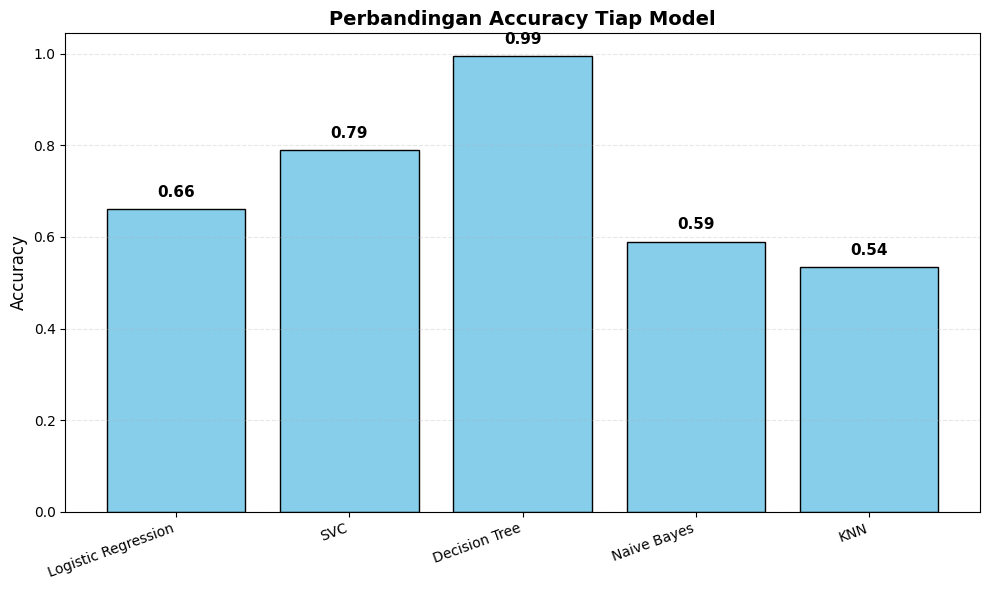

In [381]:
models = ["Logistic Regression","SVC","Decision Tree", "Naive Bayes", "KNN"]
accuracy_scores = [accuracy_lr, accuracy_svc, accuracy_dt, accuracy_nb, accuracy_knn]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color='skyblue', edgecolor='black')

# Tambahkan nilai di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.02,
        f"{yval:.2f}",
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize=11
    )

plt.ylabel('Accuracy', fontsize=12)
plt.title('Perbandingan Accuracy Tiap Model', fontsize=14, fontweight='bold')
plt.xticks(rotation=20, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


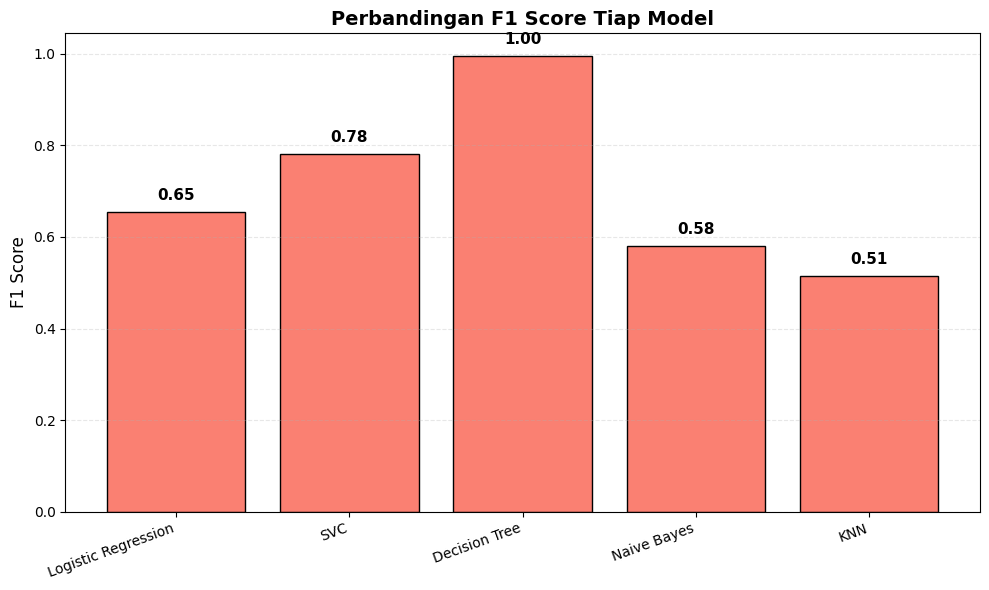

In [382]:
models = ["Logistic Regression","SVC","Decision Tree", "Naive Bayes", "KNN"]
f1_scores = [f1_lr, f1_svc, f1_dt, f1_nb, f1_knn] 

plt.figure(figsize=(10, 6))
bars = plt.bar(models, f1_scores, color='salmon', edgecolor='black')

# Tambahkan nilai di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.02,
        f"{yval:.2f}",
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize=11
    )

plt.ylabel('F1 Score', fontsize=12)
plt.title('Perbandingan F1 Score Tiap Model', fontsize=14, fontweight='bold')
plt.xticks(rotation=20, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


Dari kelima model, Decision tree memiliki score accuracy dan f1 score yang paling tinggi, hampir 100%.

# **Kesimpulan**

Dataset yang digunakan dalam proyek ini memberikan gambaran menyeluruh mengenai berbagai faktor yang dapat memengaruhi **kesehatan pohon**, mulai dari **dimensi fisik pohon**, **kondisi lingkungan**, **komposisi tanah**, hingga **tingkat keanekaragaman hayati**. Melalui proses *Exploratory Data Analysis (EDA)*, diperoleh beberapa temuan penting yang menggambarkan hubungan antar variabel.

1. **Disturbance Level**  
   Memiliki **korelasi negatif terkuat** dengan *Health_Status* (r = **-0.50**).  
   Menunjukkan bahwa semakin tinggi tingkat gangguan pada suatu ekosistem, semakin besar kemungkinan kesehatan pohon menurun.

2. **Gleason Index**  
   Menunjukkan **korelasi positif cukup kuat** (r = **0.45**).  
   Area dengan tingkat keanekaragaman dan kelimpahan spesies yang tinggi cenderung memiliki pohon yang lebih sehat.

3. **Tree_Height**  
   Memiliki **korelasi positif ** (r = **0.23**).  
   Pohon dengan tinggi yang lebih besar cenderung lebih sehat, walaupun pengaruhnya tidak sekuat dua faktor sebelumnya.

Selain itu, ditemukan adanya **kualitas data yang kurang baik pada kolom `Latitude` dan `Longitude`**, di mana beberapa titik data berada di wilayah perairan. Untuk menghindari bias (*noise*) pada model prediksi, kedua kolom ini dihapus dari proses analisis lebih lanjut.

**Pemodelan dan Evaluasi**

Lima algoritma klasifikasi digunakan untuk memprediksi *Health_Status*, yaitu:

1. Logistic Regression  
2. Support Vector Classifier (SVC)  
3. Decision Tree  
4. Naive Bayes  
5. K-Nearest Neighbors (KNN)

Berdasarkan hasil evaluasi menggunakan metrik **akurasi** dan **F1-Score**, model **Decision Tree Classifier** menunjukkan performa paling baik dengan hasil sebagai berikut:

- **Akurasi:** 99.5%  
- **F1-Score:** 0.995

Hasil ini menunjukkan bahwa *Decision Tree* sangat efektif dalam mempelajari pola dari data dan mampu memprediksi status kesehatan pohon dengan tingkat akurasi yang sangat tinggi.

Secara keseluruhan, proyek ini berhasil menunjukkan bagaimana faktor lingkungan, keanekaragaman hayati, dan tingkat gangguan berpengaruh terhadap kondisi kesehatan pohon.  
Model *Decision Tree* terbukti menjadi pendekatan paling optimal dalam mengidentifikasi pola tersebut, sehingga dapat menjadi dasar pengambilan keputusan untuk pemantauan dan pengelolaan kesehatan ekosistem hutan di masa depan.